In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [107]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [108]:
df.shape

(13320, 9)

In [109]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [111]:
df.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [112]:
df.location.value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [113]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [114]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [115]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# Data cleaning

In [116]:
# convert size(bhk) to num
df1 = df.copy()

def convertToNum( x) :
    try :
        return  int(x.split(' ')[0])
    except :
        return np.nan 
    
df1['bhk'] = df['size'].apply(convertToNum )
df1['bhk'].describe()

count    13304.000000
mean         2.803743
std          1.294974
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bhk, dtype: float64

In [117]:
# convert to number
def strTOfloat(x):
    try:
        return round(float(x),2)
    except:
        try:
            return  round(sum(list(map(float , x.split('-')))) / 2 , 2)
        except : 
            return np.nan
        
        

df1['total_sqft'] = df['total_sqft'].apply(strTOfloat)
df1['total_sqft'].describe()

count    13274.000000
mean      1559.626694
std       1238.405258
min          1.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [118]:

df1 = df1.drop([ 'area_type' , 'society' , 'availability' , 'size' ] , axis=1)

In [119]:
df1.isna().sum()

location        1
total_sqft     46
bath           73
balcony       609
price           0
bhk            16
dtype: int64

In [120]:
df2 = df1.copy()

df2['bath'].fillna(df1['bath'].mean() ,inplace=True)
df2['balcony'].fillna(df1['balcony'].mean() ,inplace=True)
df2['bhk'].fillna(df1['bhk'].mean() ,inplace=True)
df2['total_sqft'].fillna(df1['total_sqft'].mean() ,inplace=True)


df2.dropna(inplace=True) 


df2.isna().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

# Feature Engineering

In [121]:
# add col price_per_sqft
df3 = df2.copy()
df3['price_per_sqft'] = df2['price']*100000 /   df2['total_sqft'] 
df3.price_per_sqft.describe()

count    1.331900e+04
mean     7.912463e+03
std      1.062505e+05
min      2.678298e+02
25%      4.266667e+03
50%      5.438596e+03
75%      7.325211e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [122]:
df3.to_csv("bhp.csv",index=False)

# Dimensionality Reduction


In [123]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [124]:
location_stats.values.sum()

13319

In [125]:

len(location_stats[location_stats>10])

241

In [126]:
len(location_stats)

1294

In [127]:
location_less_than_10 =  location_stats[location_stats<=10]
location_less_than_10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [128]:
df4 = df3.copy()
df4.location = df4.location.apply( lambda x : 'other' if x in location_less_than_10 else x )

In [129]:
df4.groupby('location')['price_per_sqft'].mean()


location
1st Block Jayanagar          11496.236323
1st Phase JP Nagar            9909.870571
2nd Phase Judicial Layout     4048.701183
2nd Stage Nagarbhavi         17349.228395
5th Block Hbr Layout         12137.476027
                                 ...     
Yelahanka                     5365.719994
Yelahanka New Town            5643.984671
Yelenahalli                   4012.550871
Yeshwanthpur                  6981.015978
other                         9395.096316
Name: price_per_sqft, Length: 242, dtype: float64

# Remove Outliers with  Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [130]:
df5 = df4.copy()
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [131]:
df5[ (df5.total_sqft  / df5.bhk ) < 300  ].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,1020.0,6.0,1.584376,370.0,6.0,36274.509804
45,HSR Layout,600.0,9.0,1.584376,200.0,8.0,33333.333333
58,Murugeshpalya,1407.0,4.0,1.000000,150.0,6.0,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.000000,85.0,8.0,6296.296296
70,other,500.0,3.0,2.000000,100.0,3.0,20000.000000


In [132]:
df5 = df5[ (df5.total_sqft  / df5.bhk ) > 300  ]
df5.shape

(12389, 7)

Outlier Removal Using Standard Deviation and Mean

In [133]:
df5.price_per_sqft.describe()

count     12389.000000
mean       6216.589184
std        4064.803962
min         267.829813
25%        4200.000000
50%        5267.778753
75%        6842.105263
max      176470.588235
Name: price_per_sqft, dtype: float64

In [134]:
#Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices.
# We should remove outliers per location using mean and one standard deviation


def remove_pps_outliers(df , std):

    new_df = pd.DataFrame()
    for location, location_df in df.groupby('location'):
        
        loc_mean = location_df.price_per_sqft.mean() 
        loc_std = location_df.price_per_sqft.std()
        
        reduced_df = location_df[  ( location_df.price_per_sqft >  (loc_mean  - std * loc_std)  ) & (location_df.price_per_sqft <  (loc_mean  + std * loc_std) )  ] 
                
        new_df =  pd.concat([new_df , reduced_df] , ignore_index=True)
        
    return new_df            
            
df6 = remove_pps_outliers(df5 , 1)
df6.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0,11983.805668


In [135]:
df5.shape  , df6.shape

((12389, 7), (10163, 7))

## Detect BHK outliers using Business Knowledge 
for same location and same total_sqft area the mean price of large bhk is larger than mean price of small bhk

In [136]:
def plot_scatter_chart(df,location):
    
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    matplotlib.rcParams['figure.figsize'] = (10,5)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    
    plt.title(location)
    plt.legend()
    

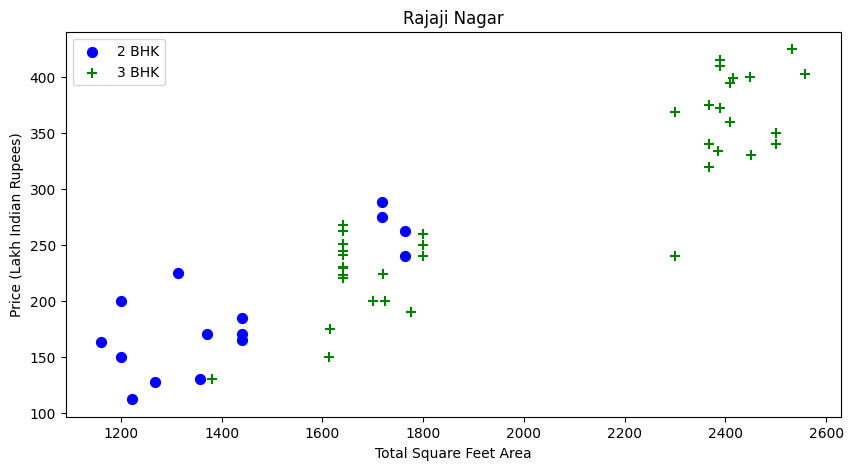

In [137]:
plot_scatter_chart(df6,"Rajaji Nagar")


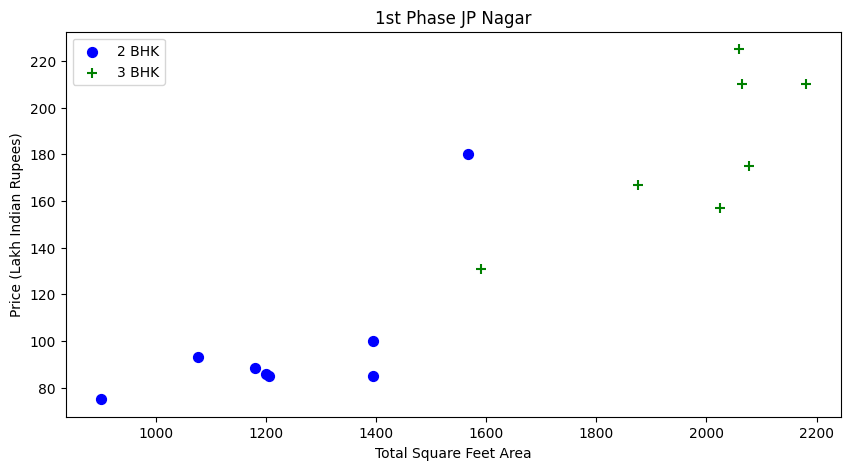

In [138]:
plot_scatter_chart(df6,"1st Phase JP Nagar")


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).

In [139]:
import json

def remove_bhk_outliers(df ):
    
    # location_stats = {}
    exclude_indices = np.array([])
    
    for location,location_df in df.groupby('location'):
        
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            
            bhk_stats[bhk] = {
                'mean' : bhk_df.price_per_sqft.mean() , 
                'count' : len(bhk_df)
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            # print(bhk , stats)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft  < stats['mean'] ].index.values)
                
    return df.drop(exclude_indices,axis='index')
        
        # location_stats[location] = bhk_stats
    # print(json.dumps(location_stats, indent=4))            
        
        
        
df7 = remove_bhk_outliers(df6)
    
df7.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0,11983.805668


In [140]:
df7.shape

(7254, 7)

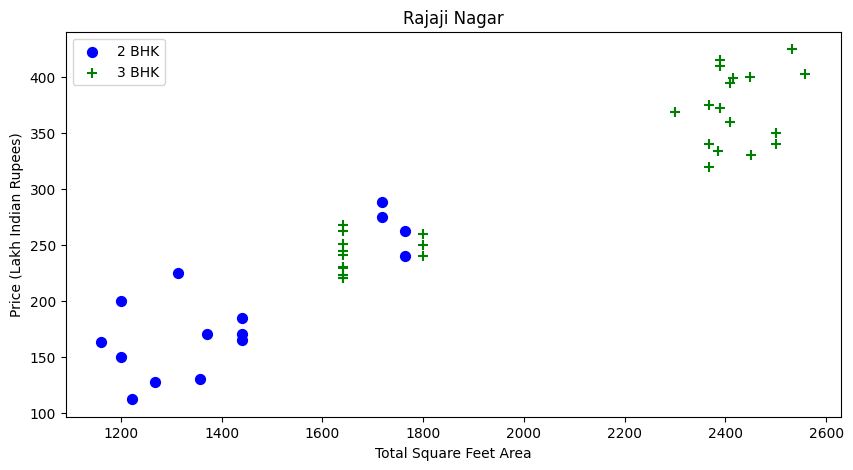

In [141]:
plot_scatter_chart(df7,"Rajaji Nagar")


# Detech Bath and Bhk Outliers

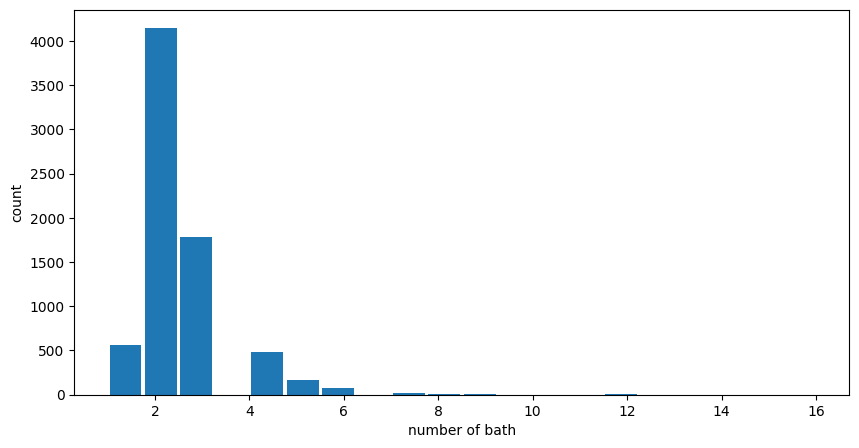

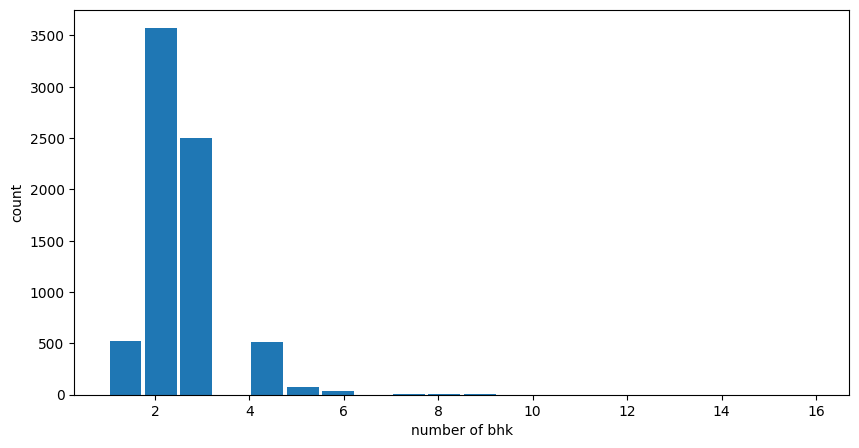

In [142]:

def plot_histogram(df , col) :
    
    plt.hist(df[col] , bins = 20 , rwidth= 0.9)
    
    mean = df[col].mean()
    std_dev = df[col].std()    
        
    # x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)
    # y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

    # plt.plot(x, y, color='blue', label='Normal Distribution')
        
    plt.xlabel('number of ' + col)
    plt.ylabel('count')
    
    plt.show()
    
plot_histogram(df7 , 'bath')
plot_histogram(df7 , 'bhk')


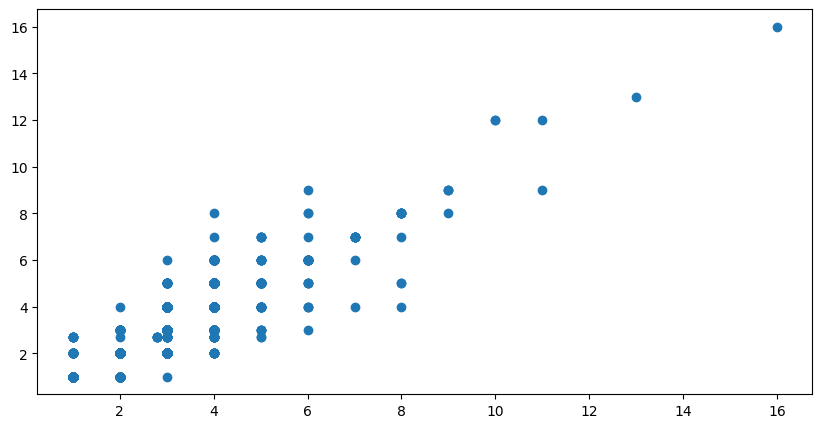

In [143]:
plt.scatter(df7.bhk , df7.bath)
plt.show()

In [144]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
df8 = df7.copy()
df8[ df8.bath > df8.bhk + 2  ]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1586,Chikkabanavar,2460.0,7.0,2.000000,80.0,4.0,3252.032520
5183,Nagasandra,7000.0,8.0,1.584376,450.0,4.0,6428.571429
6673,Thanisandra,1806.0,6.0,2.000000,116.0,3.0,6423.034330
8363,other,11338.0,9.0,1.000000,1000.0,6.0,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [145]:
df8 = df8[ df8.bath <= df8.bhk + 2  ]

In [146]:
df8.shape

(7250, 7)

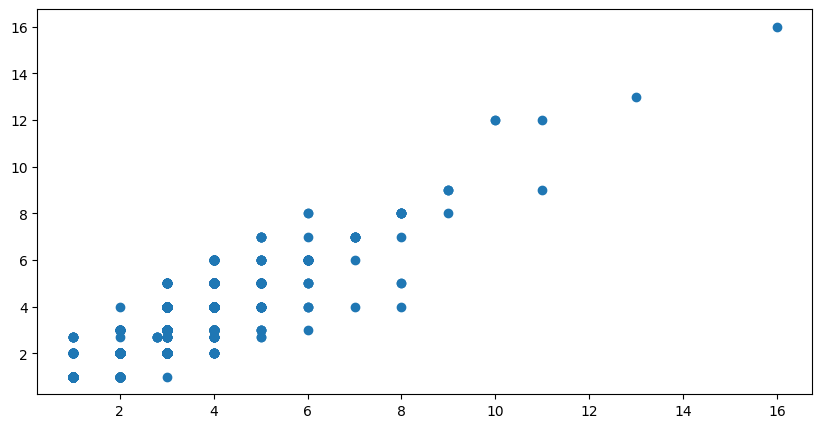

In [147]:
plt.scatter(df8.bhk , df8.bath)
plt.show()

In [148]:
df8.iloc[ : , 1:  ].corr()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
total_sqft,1.000000,0.712267,0.225949,0.840236,0.687629,0.371452
bath,0.712267,1.000000,0.266534,0.611956,0.877897,0.360885
balcony,0.225949,0.266534,1.000000,0.184524,0.265331,0.093348
price,0.840236,0.611956,0.184524,1.000000,0.573171,0.724455
bhk,0.687629,0.877897,0.265331,0.573171,1.000000,0.339951
price_per_sqft,0.371452,0.360885,0.093348,0.724455,0.339951,1.000000


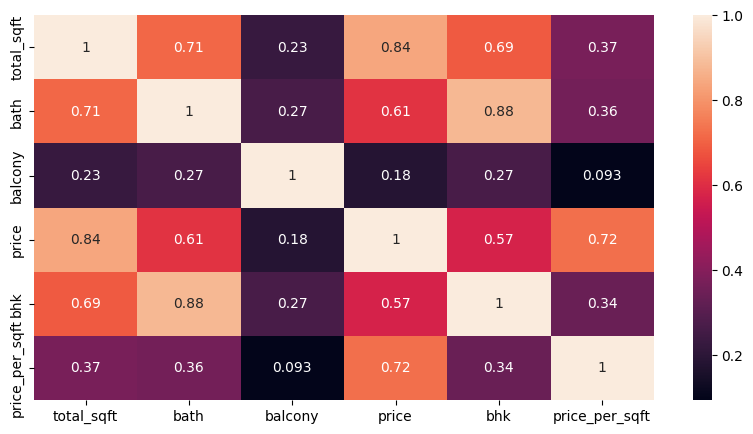

In [149]:
sns.heatmap(df8.iloc[ : , 1:  ].corr() , annot=True)
plt.show()

balcony is not contributing so much therefor we can remove it

In [150]:
df8 = df8.drop('balcony' , axis=1 )

# using one hot encoding

In [151]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [152]:

location_dummies = pd.get_dummies( df8['location']  , drop_first=True)
df9 =  pd.concat( [  df8 ,  location_dummies ] , axis=1)
df9.shape

(7250, 247)

In [153]:
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
df_final = df9.drop(['location' , 'price_per_sqft'] , axis=1 )
df_final.shape

(7250, 245)

In [155]:
df_final.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Building Model

In [156]:
X = df_final.drop(['price'],axis='columns')
y = df_final.price

In [157]:
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10 )
X_train.shape

(5800, 244)

In [159]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84858317, 0.81256613, 0.86440096, 0.86041189, 0.81576889])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Find Best Model with Best hyperparameter with GridSearchCV


In [160]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1,2],
            }
        },
       
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.840346,{}
1,lasso,0.708213,{'alpha': 1}
2,ridge,0.836344,{'alpha': 1}


In [161]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7953848308039082

# Test the model for few properties

In [175]:
y_pred = lr_clf.predict( X_test)



In [176]:
from sklearn.metrics import r2_score,mean_squared_error

print(r2_score(y_pred , y_test))
print(mean_squared_error(y_pred , y_test))

0.8047766493834724
1371.2134910993982


In [201]:
lr_clf.predict(  np.array(X_test.iloc[6 , :].values).reshape(1,-1) )


array([140.47159297])

In [198]:
y_test.iloc[6]

91.855

In [167]:
def predict_price(location,sqft,bath,bhk): 
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

predict_price('1st Phase JP Nagar',1000, 2, 2)


88.46574702322317

In [199]:
predict_price('other',1732, 3, 3)


140.42921735796853

In [172]:
predict_price('1st Phase JP Nagar',1000, 3, 3)
# 86.08062284985995
# predict_price('Indira Nagar',1000, 2, 2)
# 193.31197733179556
# predict_price('Indira Nagar',1000, 3, 3)

87.30197745880514

# Export the tested model to a pickle file

In [165]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [166]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))